Ссылки на датасеты с ценами BTC и USD:
- BTC - https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

- USD - https://finance.yahoo.com/quote/DX-Y.NYB/history?p=DX-Y.NYB

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as smt
from matplotlib import pyplot as plt
from datetime import datetime as dt

bc = pd.read_csv('BTC-USD.csv', index_col=0, parse_dates=True)
usd = pd.read_csv('DX-Y.NYB.csv', index_col=0, parse_dates=True)

In [ ]:
# удаляем столбцы с индексами 0-4
bc = bc.drop(bc.columns[[0,1,2,4]], axis=1)
bc.tail()

,Close,Volume
Date,,
2023-10-16,28519.466797,27833876539
2023-10-17,28415.748047,14872527508
2023-10-18,28328.341797,12724128586
2023-10-19,28719.806641,14448058195
2023-10-20,30033.457031,21867171840


In [ ]:
# удаляем столбцы с индексами 1-5
usd = usd.drop(usd.columns[[1,2,3,4,5]], axis=1)
usd.head()

,Open
Date,
2014-09-17,84.099998
2014-09-18,84.739998
2014-09-19,84.279999
2014-09-21,NaN
2014-09-22,84.809998


In [ ]:
print(bc.shape)
print(usd.shape)

(3321, 2)
(2763, 1)


In [ ]:
bc.describe()

,Close,Volume
count,3321.000000,3.321000e+03
mean,14061.011504,1.645222e+10
std,15956.634539,1.924530e+10
min,178.102997,5.914570e+06
25%,823.984009,1.399610e+08
50%,8052.543945,1.073261e+10
75%,22487.388672,2.705580e+10
max,67566.828125,3.509679e+11


In [ ]:
usd.describe()

,Open
count,2288.000000
mean,96.895852
std,4.874215
min,84.099998
25%,93.739998
50%,96.529999
75%,99.190002
max,114.190002


In [ ]:
print(usd.isnull().sum(), '\n')
print(bc.isnull().sum())

Open    475
dtype: int64 

Close     0
Volume    0
dtype: int64


In [ ]:
usd = usd.dropna()
usd.rename(columns={'Open' : 'Price'}, inplace=True)
usd

,Price
Date,
2014-09-17,84.099998
2014-09-18,84.739998
2014-09-19,84.279999
2014-09-22,84.809998
2014-09-23,84.690002
...,...
2023-10-13,106.519997
2023-10-16,106.580002
2023-10-17,106.260002


![image.png](attachment:0e05f8ef-1529-47df-bdad-d58ebde21ffa.png)

In [ ]:
joined = bc
for x in join.index.values:
    for x2 in usd.index.values:
        if x == x2:
            itemindex = np.where(usd.index==x2)[0][0]
            val = usd.at[x2, "Price"]
            joined.at[x, 'Price'] = val
print(joined.shape)
joined.head()

(3321, 3)


,Close,Volume,Price
Date,,,
2014-09-17,457.334015,21056800,84.099998
2014-09-18,424.440002,34483200,84.739998
2014-09-19,394.795990,37919700,84.279999
2014-09-20,408.903992,36863600,NaN
2014-09-21,398.821014,26580100,NaN


In [ ]:
joined = pd.merge(usd, bc, on='Date')
joined.head()

,Price_x,Close,Volume,Price_y
Date,,,,
2014-09-17,84.099998,457.334015,21056800,84.099998
2014-09-18,84.739998,424.440002,34483200,84.739998
2014-09-19,84.279999,394.795990,37919700,84.279999
2014-09-22,84.809998,402.152008,24127600,84.809998
2014-09-23,84.690002,435.790985,45099500,84.690002


In [ ]:
joined = joined.drop(joined.columns[[0]], axis=1)
joined.rename(columns={'Price_y' : 'Price'}, inplace=True)
joined.head()

,Close,Volume,Price
Date,,,
2014-09-17,457.334015,21056800,84.099998
2014-09-18,424.440002,34483200,84.739998
2014-09-19,394.795990,37919700,84.279999
2014-09-22,402.152008,24127600,84.809998
2014-09-23,435.790985,45099500,84.690002


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

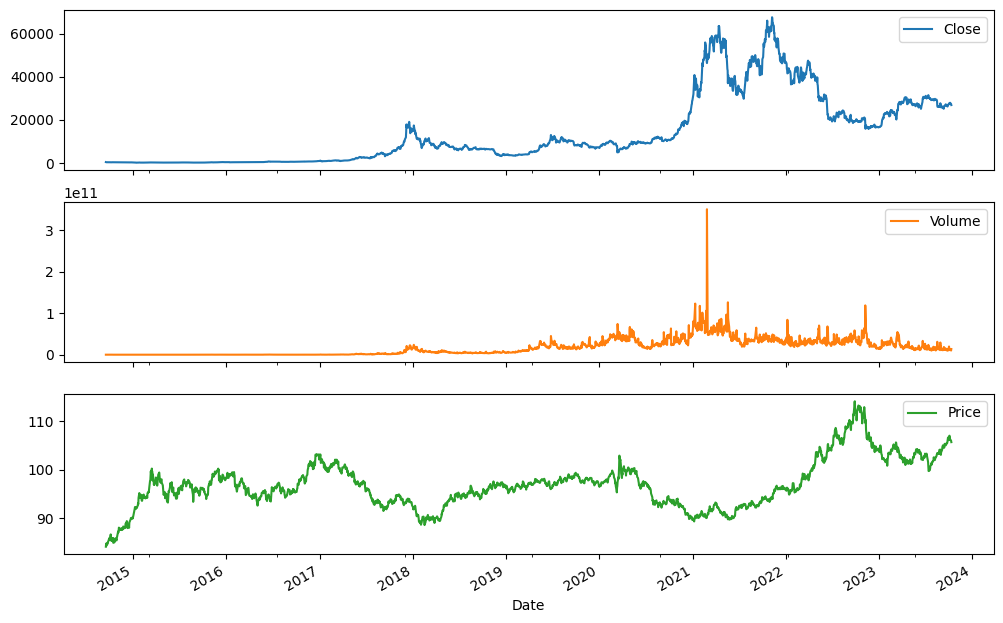

In [ ]:
join = join.dropna()
join
joined.plot(subplots=True, figsize=(12,8))

Визуально сравнивая цены на биткоин и доллар США, мы можем увидеть пик биткоина примерно в 2017-2018 годах и снижение в США примерно в то же время. Аналогичная картина наблюдается ближе к концу 2020 года и в 2021 году. Мы собираемся расследовать это дальше.

In [ ]:
def plotcharts(y, title, lags=None, figsize=(12,8)):
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight="bold")
    y.plot(ax=hist_ax, kind="hist", bins=25)
    hist_ax.set_title("Histogram")
    smt.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

[Source](https://www.youtube.com/watch?v=_vQ0W_qXMxk&t=1157s)

In [ ]:
series = joined

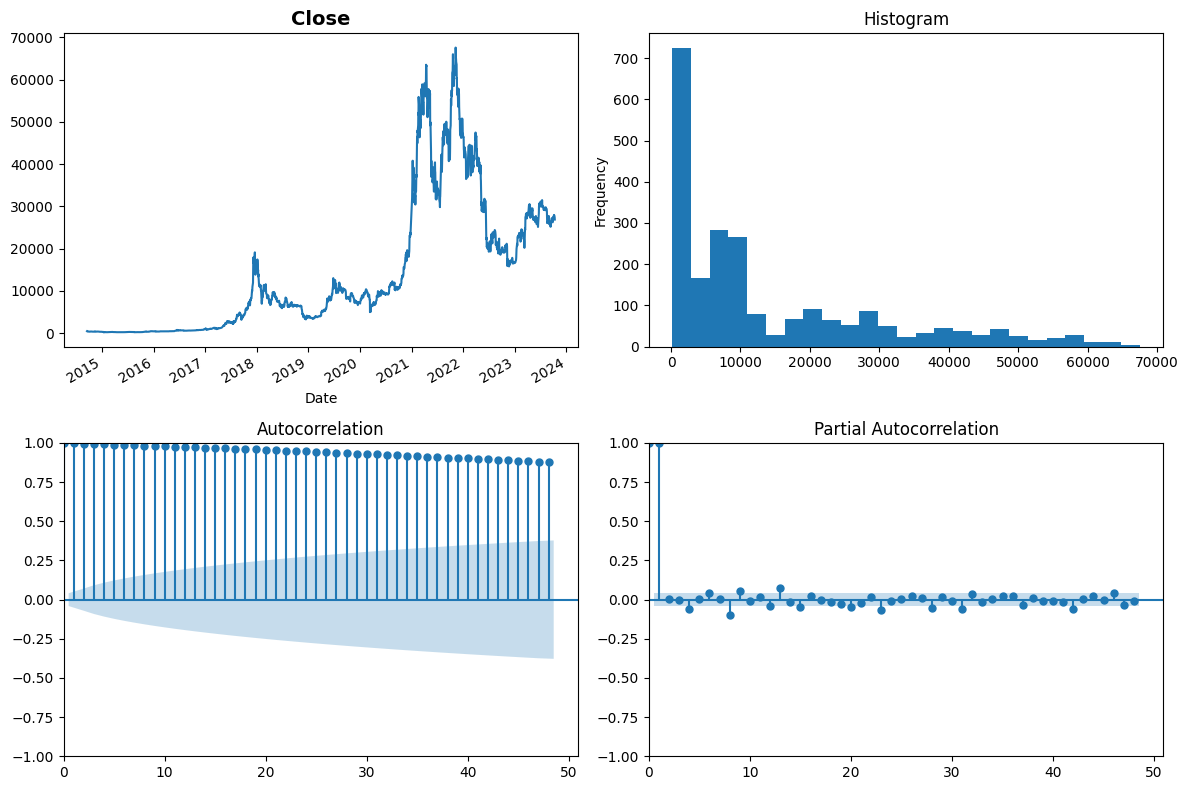

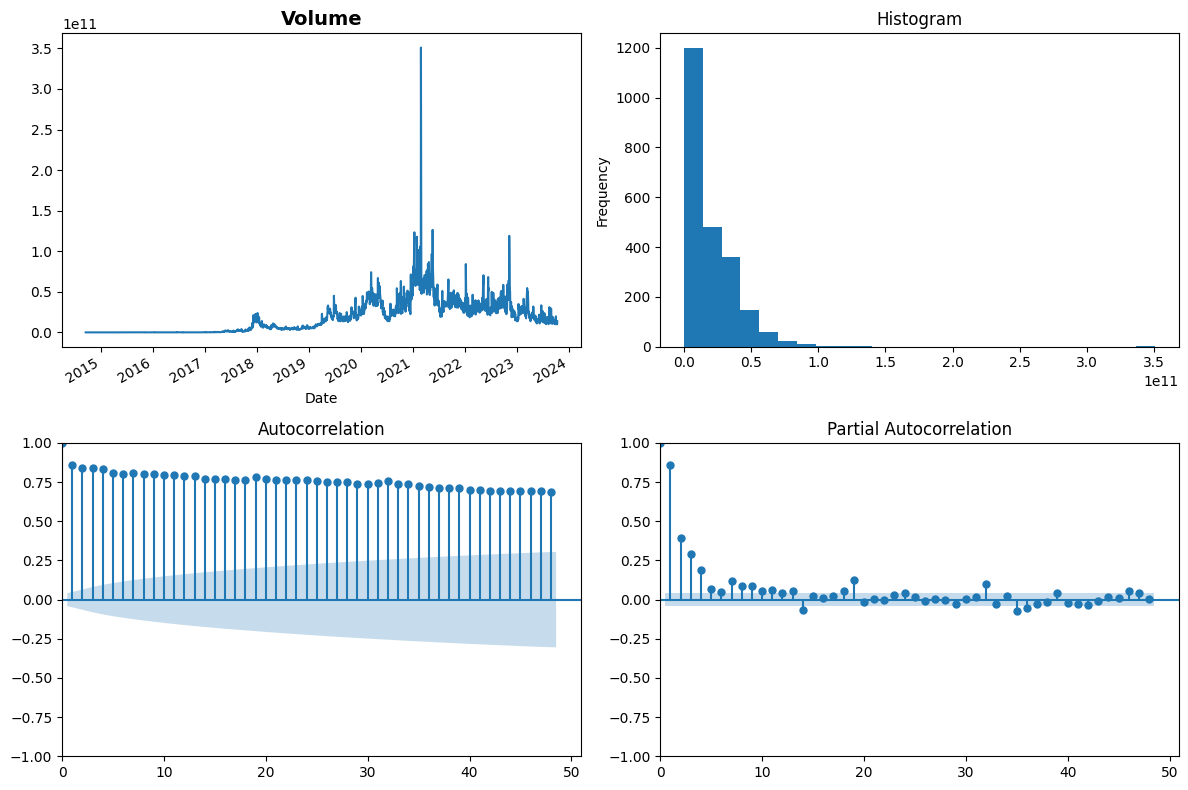

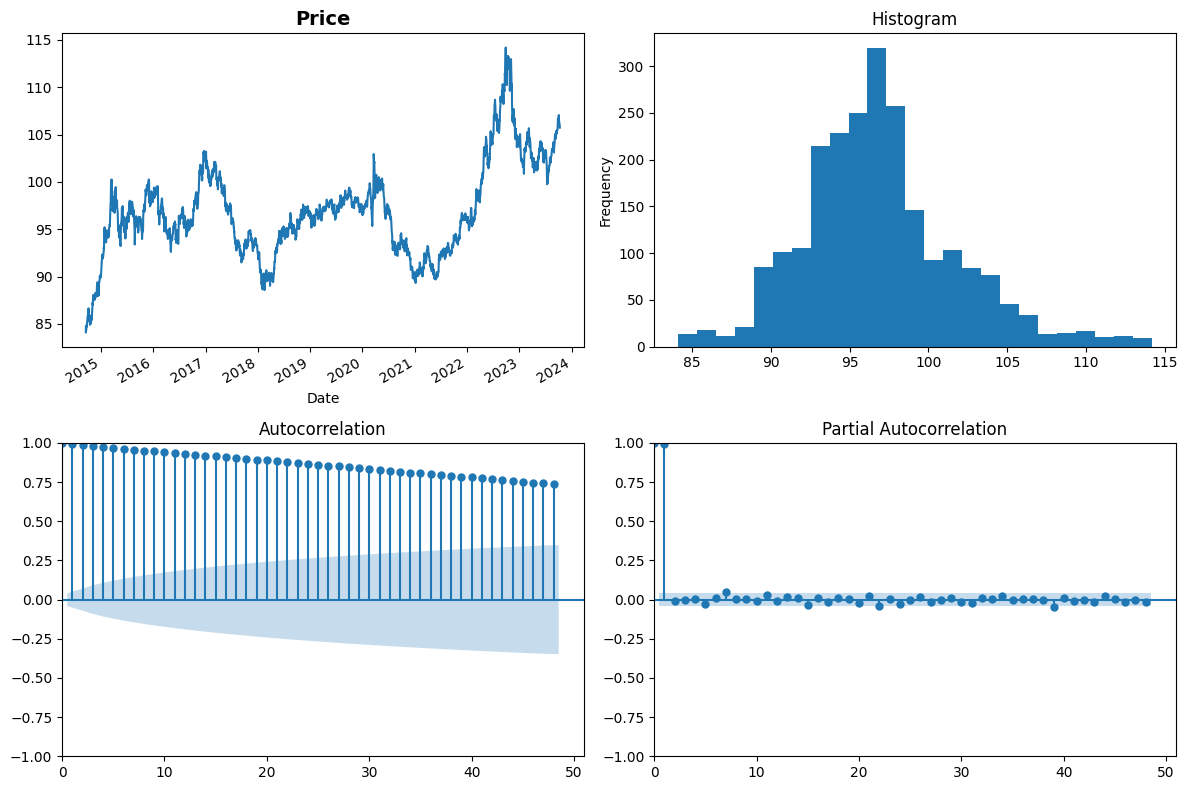

In [ ]:
num_var = len(series.iloc[1,:])
for i in range(0, num_var):
    plotcharts(series.iloc[:,i].dropna(), title=series.columns[i], lags=48)

Здесь мы построим четыре основных графика, которые дают нам представление о цене закрытия биткойна за этот период времени. Два нижних графика - это графики, которые позволяют вам взглянуть на структуру зависимостей. Они называются графиками автокорреляционных и частичных автокорреляционных функций. Каждая полоска на графике автокорреляционной функции отражает сам ряд и то, как он соотносится с его собственным прошлым. Такого рода графики очень полезны для определения порядка нашей модели.

### Автокорреляция и частичная автокорреляция

Коэффициент корреляции между двумя значениями во временном ряду называется автокорреляционной функцией (ACF). Например, ACF для временного ряда задается формулой:

$$\text{Corr}(y_{t},y_{t-k})$$

Это значение k является рассматриваемым временным промежутком и называется запаздыванием. Автокорреляция с запаздыванием 1 (т.е. k = 1 в приведенном выше примере) - это корреляция между значениями, разделенными одним периодом времени. В более общем плане автокорреляция с запаздыванием k - это корреляция между значениями, разделенными k периодами времени.

ACF - это способ измерения линейной зависимости между наблюдением в момент времени t и наблюдениями в предыдущие моменты времени. Если мы примем модель AR (k), то мы, возможно, пожелаем измерить только связь между и и отфильтровать линейное влияние случайных величин, которые находятся между ними (т.е. , ), что требует преобразования временного ряда. Затем, вычисляя корреляцию преобразованных временных рядов, мы получаем частичную автокорреляционную функцию (PACF).

PACF наиболее полезен для определения порядка авторегрессионной модели. В частности, выборочные частичные автокорреляции, которые значительно отличаются от 0, указывают на запаздывающие члены, которые являются полезными предикторами . Чтобы помочь провести различие между ACF и PACF, думайте о них как об аналогах и частичных значениях, как обсуждалось ранее.

Графические подходы к оценке запаздывания авторегрессионной модели включают в себя сопоставление значений ACF и PACF с запаздыванием. На графике зависимости ACF от запаздывания, если вы видите большие значения ACF и неслучайную закономерность, то, вероятно, значения последовательно коррелируют. На графике зависимости PACF от запаздывания закономерность обычно будет казаться случайной, но большие значения PACF при заданном запаздывании указывают на это значение как на возможный выбор для порядка авторегрессионной модели. Важно, чтобы выбор заказа имел смысл. Например, предположим, что у вас есть данные о кровяном давлении за каждый день за последние два года. Вы можете обнаружить, что модель AR(1) или AR (2) подходит для моделирования артериального давления. Однако PACF может указывать на большое значение частичной автокорреляции с запаздыванием 17, но такой большой порядок для модели авторегрессии, вероятно, не имеет особого смысла.

## Стационарное состояние

Данные временных рядов состоят из четырех основных компонентов:

1. Тенденция
2. Сезонность
3. Циклически
4. Нерегулярность, иногда называемая случайной составляющей

#### Тенденция

- Тренд - это увеличение или уменьшение ряда за определенный период времени, он сохраняется в течение длительного периода времени.
- Пример: Рост численности населения на протяжении многих лет можно рассматривать как тенденцию к росту.

#### Сезонность

- Регулярный характер колебаний вверх и вниз.
- Это краткосрочные колебания, возникающие из-за сезонных факторов
- Пример: Продажи мороженого увеличиваются в летний сезон

#### Циклически

- Это среднесрочное изменение, вызванное обстоятельствами, которые повторяются с нерегулярными интервалами.
- Пример: 5 лет экономического роста, за которыми следуют 2 года экономического спада, за которыми следуют 7 лет экономического роста, за которыми следует 1 год экономического спада

#### Неправильность

- Это относится к вариациям, которые происходят из-за непредсказуемых факторов, а также не повторяются по определенным схемам.
- Пример: Изменения, вызванные такими инцидентами, как землетрясение, наводнения, война и т.д.

Если в наборе данных представлены все четыре компонента временного ряда, то данные нестационарны, что означает, что обычно эти компоненты будут присутствовать. Если данные не являются стационарными, то прогнозирование временных рядов будет эффективным. Применение его к набору данных с присутствием каждого компонента на самом деле не будет работать хорошо.

Итак, как нам провести различие между этими временными рядами?

Стационарный временной ряд зависит от:

1. Имею в виду
2. Дисперсия
3. Совместное отклонение

## Нормализация

Нормализованные данные в рамках статистики часто предполагают исключение единиц измерения из набора данных. В результате это позволяет нам легко сравнивать данные с различными масштабами, полученные из разных источников.

Почему важны нормализованные данные?
При обучении модели машинного обучения мы стремимся привести данные к единому масштабу, чтобы различные функции были менее чувствительны друг к другу. В этом случае мы можем использовать нормализацию данных как метод преобразования наших данных, которые могут иметь разные единицы измерения или масштабы (биткойн и доллар США). Это позволяет нашей модели обучаться, используя функции, которые могли бы привести к более точным прогнозам.

## Трансформация

Применение разностного или сезонного логарифма различий в серии должно привести к стационарности серии.

Проще говоря, стационарность удаляет тренды из набора данных, которые могут быть чрезвычайно навязчивыми для наших моделей. По сути, стационарность делает наши модели более эффективными и прогнозируемыми.

,Close,Volume,Price
0,0.448201,0.524709,0.288059
1,0.533220,0.501307,0.689572
2,0.505407,0.756716,0.374730
3,0.340867,0.428152,0.526281
4,0.447430,0.627242,0.570192
...,...,...,...
2275,0.419890,0.601027,0.450890
2276,0.477769,0.597330,0.481044
2277,0.415117,0.548944,0.522188
2278,0.451866,0.576459,0.528482


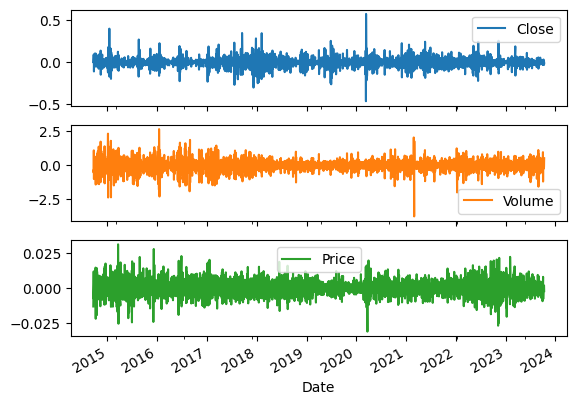

In [ ]:
# Преобразование данных в логарифмическую шкалу
log = pd.DataFrame(np.log(series))

# Изменение значений log
#1
log_diff = log.diff().dropna()
#2
log_diff = log_diff.diff().dropna()
log_diff.plot(subplots=True)

# импортируем для нормализации
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()

# нормализация
join_norm = pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
join_norm

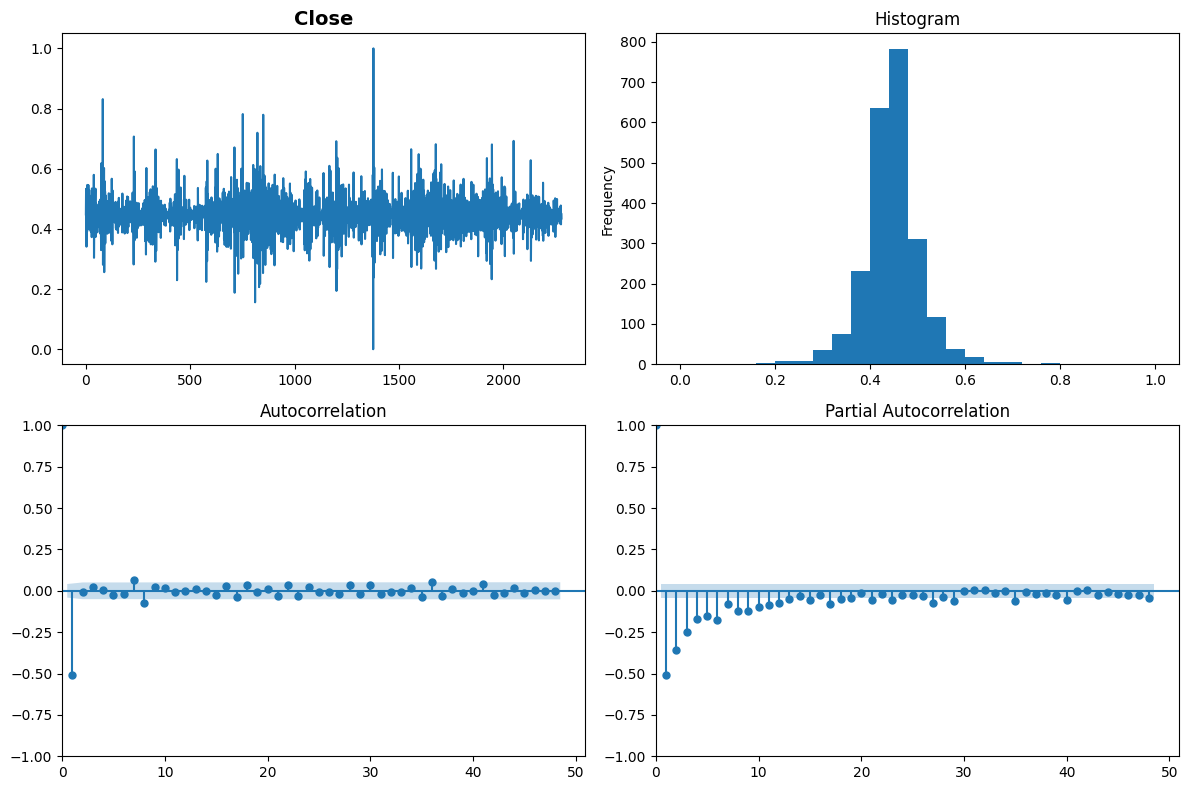

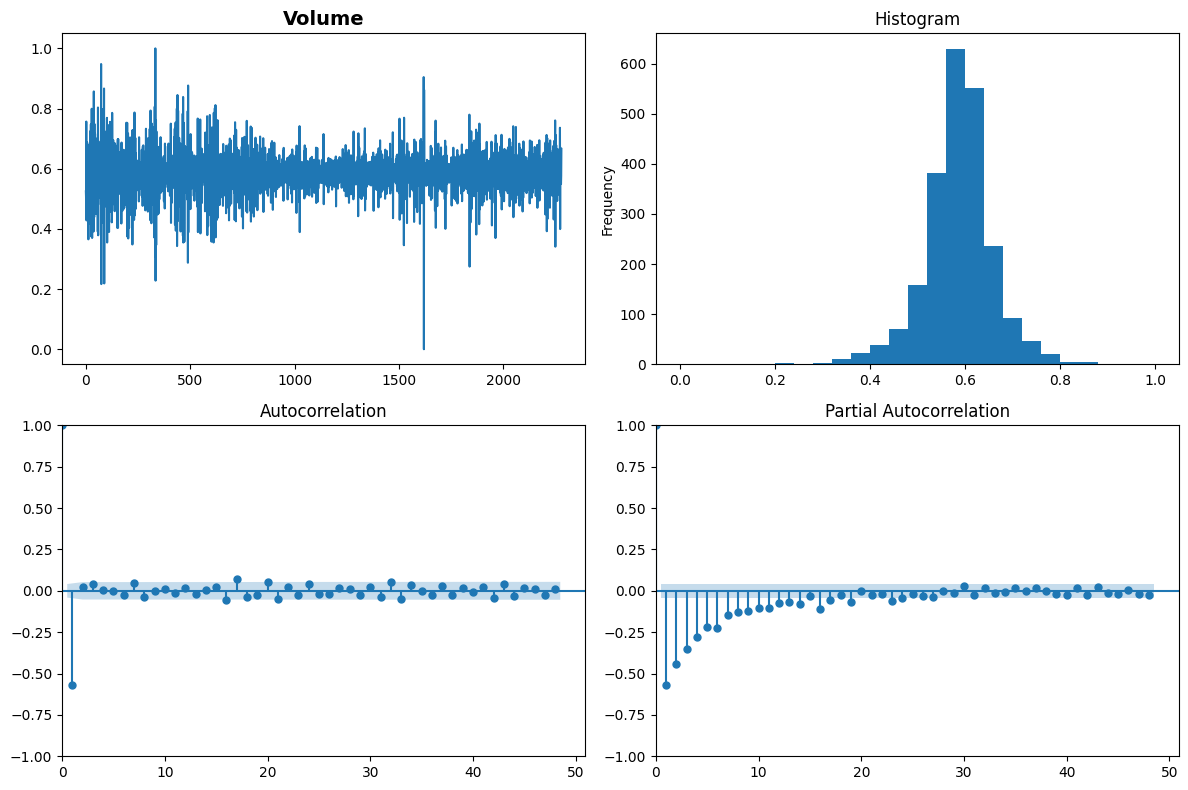

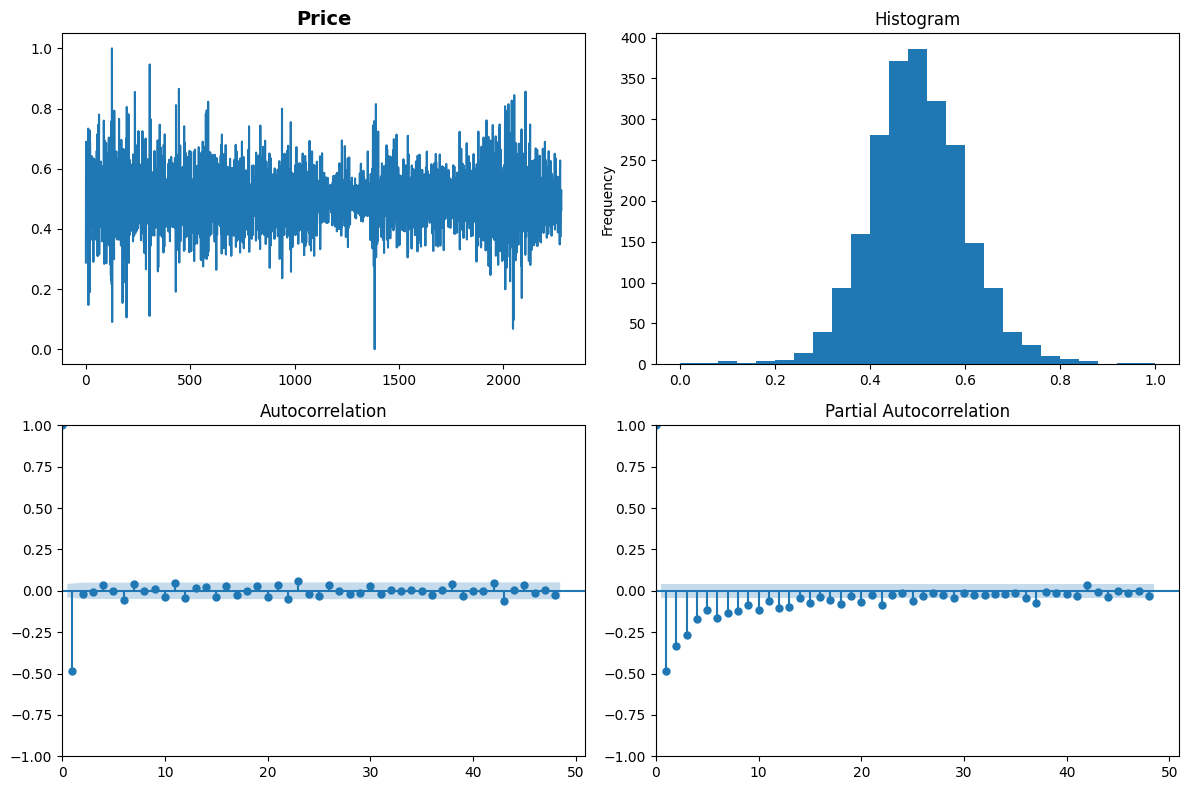

In [ ]:
num_var = len(join_norm.iloc[1,:])
for i in range(0, num_var):
    plotcharts(join_norm.iloc[:,i].dropna(), title=join_norm.columns[i], lags=48)

Здесь мы проводим статистический тест, чтобы определить, насколько хорошо временной ряд был преобразован в стационарный. Это тест, который выводит определенные статистические закономерности, которые мы можем использовать, чтобы судить о том, является ли каждый параметр стационарным.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag= "AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num of Observations Used For ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)
    print('\n\n')

ad_test(log_diff["Close"])
print("--------------------------------------------")
ad_test(log_diff["Volume"])
print("--------------------------------------------")
ad_test(log_diff["Price"])

1. ADF :  -15.770806118602874
2. P-Value :  1.161626342796163e-28
3. Num Of Lags :  27
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  2252
5. Critical Values : 
	 1% :  -3.4332570912439784
	 5% :  -2.8628242753115747
	 10% :  -2.5674536799892103
--------------------------------------------
1. ADF :  -18.710298715384397
2. P-Value :  2.03487344655876e-30
3. Num Of Lags :  27
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  2252
5. Critical Values : 
	 1% :  -3.4332570912439784
	 5% :  -2.8628242753115747
	 10% :  -2.5674536799892103
--------------------------------------------
1. ADF :  -16.957463386125475
2. P-Value :  9.362314606623571e-30
3. Num Of Lags :  25
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  2254
5. Critical Values : 
	 1% :  -3.43325450880204
	 5% :  -2.862823135013053
	 10% :  -2.567453072861103


ADF (Augmented Dickey-Fuller) тест является статистическим тестом, используемым для проверки наличия единичных корней во временном ряде. Он используется для определения стационарности временного ряда. В данном случае, приведенные параметры и их значения описывают результаты ADF-теста для данного временного ряда.

1. ADF: -16.957463386125475
   Значение ADF (Augmented Dickey-Fuller) статистики. Более отрицательное значение указывает на более сильное доказательство в пользу стационарности временного ряда.

2. P-Value: 9.362314606623571e-30
   P-значение (p-value) представляет вероятность получить такие или еще более экстремальные результаты, если нулевая гипотеза верна. В данном случае, очень низкое значение p-значения (близкое к нулю) говорит о том, что есть значительные доказательства в пользу отвержения нулевой гипотезы (нулевая гипотеза: временной ряд имеет единичный корень и нестационарен).

3. Num Of Lags: 25
   Количество лагов, использованных при проведении ADF-регрессии. Лаги используются для учета автокорреляции в данных. В данном случае было использовано 25 лагов.

4. Num of Observations Used For ADF Regression and Critical Values Calculation: 2254
   Количество наблюдений, используемых при проведении ADF-регрессии и расчете критических значений. Чем больше количество наблюдений, тем более надежные результаты теста.

5. Critical Values:
   Критические значения используются для определения статистической значимости результата теста. Чем более отрицательное значение статистики ADF, чем дальше от нуля находятся значения критических значений, тем более уверенно можно утверждать о стационарности временного ряда.
   - 1%: -3.43325450880204
   - 5%: -2.862823135013053
   - 10%: -2.567453072861103

**Выводы:**
На основе приведенных значений можно сделать следующие выводы:
- Значение ADF гораздо меньше нуля, что указывает на сильные доказательства в пользу стационарности временного ряда.
- P-значение очень близко к нулю, что говорит о существенных доказательствах в пользу отвержения нулевой гипотезы о наличии единичного корня в ряду и нестационарности.
- Критические значения также отрицательны и далеки от нуля, подтверждая результаты теста и указывая на стационарность временного ряда.

- Поскольку рассчитанная статистика теста ADF намного ниже критических значений для всех уровней значимости, а значение p очень мало, мы можем отвергнуть нулевую гипотезу о том, что временной ряд имеет единичный корень, и сделать вывод, что временной ряд стационарен.

- В этом случае значение p составляет 2,03487344655876e-30, что намного меньше 0,05, что указывает на то, что данные стационарны.

    1. Значение ADF (Augmented Dickey-Fuller) равно -16.957463386125475. ADF тест используется для проверки наличия единичных корней во временных рядах. Отрицательное значение ADF указывает на то, что временной ряд (курс доллара) стационарен.

    2. P-значение (P-Value) равно 9.362314606623571e-30. P-значение используется для проверки статистической значимости гипотезы. В данном случае, очень низкое значение P-значения говорит о том, что гипотеза о наличии единичных корней во временном ряду отвергается.

    3. Количество лагов (Num Of Lags) равно 25. Лаги используются для учета зависимости между предыдущими значениями временного ряда. В данном случае, 25 лагов были использованы при проведении ADF регрессии и расчете критических значений.

    4. Количество наблюдений, использованных для ADF регрессии и расчета критических значений, равно 2254. Это количество наблюдений, которые были учтены при проведении статистического анализа.

    5. Критические значения (Critical Values) указывают на пороговые значения, при которых гипотеза о наличии единичных корней отвергается или принимается. В данном случае, для уровней значимости 1%, 5% и 10% критические значения составляют -3.43325450880204, -2.862823135013053 и -2.567453072861103 соответственно.

# Модели

Мы будем оценивать три метода прогнозирования данных временных рядов.
1. Векторная авторегрессионная модель (VAR)
2. Модель XGBoost
3. Facebook Prophet

#### Разделение набора обучающих тестов

Теперь нам нужно разделить выборку на обучающий и проверочный наборы. Во временных рядах мы должны быть осторожны с этим, потому что мы не можем просто случайным образом выбрать набор для обучения и тестирования из-за зависимости от времени.

На практике вам может потребоваться выполнить оценку с помощью движущегося окна, или вы тренируете свою модель, используя некоторую историю, а затем продолжаете двигаться вперед, чтобы протестировать свою модель.

Наш набор данных представлен с ежедневными интервалами, и поэтому мы можем прогнозировать с точностью до определенного количества дней.

## Векторная авторегрессионная модель (AR)

Модели VAR (векторные авторегрессионные модели) используются для многомерных временных рядов. Структура такова, что каждая переменная является линейной функцией прошлых задержек самой по себе и прошлых задержек других переменных.

В качестве примера предположим, что мы измеряем три различные переменные временного ряда, обозначаемые x_{t,1} и x_{t,2}.

Векторная авторегрессионная модель порядка 1, обозначаемая как VAR(1), выглядит следующим образом:

$$
x_{t,1} = \alpha_{1} + \phi_{11} x_{t−1,1} + \phi_{12}x_{t−1,2} + \phi_{13}x_{t−1,3} + w_{t,1}
$$

$$
x_{t,2} = \alpha_{2} + \phi_{21} x_{t−1,1} + \phi_{22}x_{t−1,2} + \phi_{23}x_{t−1,3} + w_{t,2}
$$

Каждая переменная является линейной функцией значений запаздывания 1 для всех переменных в наборе.

В модели VAR(2) значения запаздывания 2 для всех переменных добавляются к правым частям уравнений, в случае трех x-переменных (или временных рядов) в правой части каждого уравнения будет шесть предикторов, три члена запаздывания 1 и три члена запаздывания 2.

В общем, для модели VAR(p) первые p лагов каждой переменной в системе будут использоваться в качестве предикторов регрессии для каждой переменной.

Модели VAR являются частным случаем более общих моделей VARMA. Модели VARMA для многомерных временных рядов включают приведенную выше структуру VAR вместе с условиями скользящего среднего для каждой переменной. В более общем плане, это частные случаи моделей ARMAX, которые допускают добавление других предикторов, которые находятся за пределами многомерного набора, представляющего основной интерес.

[Источник](https://online.stat.psu.edu/stat510/lesson/11/11.2 )

Векторная авторегрессионная модель (VAR) - это статистический метод, используемый для прогнозирования вектора временных рядов. Это обобщение одномерной модели авторегрессии и содержит по одному уравнению на каждую переменную в системе. Модели VAR используются для учета эволюции и взаимозависимостей между несколькими временными рядами. Вот несколько ключевых моментов, касающихся моделей VAR:

- Каждая переменная в модели VAR моделируется как линейная комбинация прошлых значений самой себя и прошлых значений других переменных в системе.
- Модели VAR позволяют осуществлять обратную связь между переменными в модели, в отличие от одномерных моделей авторегрессии.
- Правая часть каждого уравнения в модели VAR включает константу и лаги всех переменных в системе.
- Прогнозы генерируются из модели VAR рекурсивным способом, где VAR генерирует прогнозы для каждой переменной, включенной в систему.
- Модели VAR используются для прогнозирования во многих областях, таких как экономика, финансы, маркетинг и экология.
- Модели VAR легко оценить с использованием обычных методов наименьших квадратов при наличии нескольких допущений, таких как стационарность переменных в модели и отсутствие идеальной мультиколлинеарности.
- Модели VAR критикуются за то, что они атеоретичны, что означает, что они не основаны на какой-либо экономической теории, которая накладывает теоретическую структуру на уравнения.

Чтобы эффективно использовать VAR для прогнозирования, вам необходимо следовать некоторым шагам и рекомендациям. Во-первых, вам необходимо определить переменные и источники данных, которые имеют отношение к вашей задаче прогнозирования. Во-вторых, вам нужно проверить стационарность и коинтеграцию переменных и при необходимости применить соответствующие преобразования или разности. В-третьих, вам необходимо выбрать оптимальную длину задержки на основе таких критериев, как информационный критерий Акаике или критерий Шварца.

Модели VAR реализованы в пакете vars на языке R. В Python пакет statsmodels предоставляет класс VAR для моделирования и прогнозирования моделей VAR. Модели VAR полезны для прогнозирования множества взаимозависимых переменных и могут использоваться в различных областях.

Метод XGBoost в прогнозировании
Метод XGBoost (eXtreme Gradient Boosting) является мощным алгоритмом машинного обучения, который широко используется для задач прогнозирования. Он основан на градиентном бустинге и предназначен для работы с различными типами данных, включая структурированные данные, тексты и изображения.

XGBoost использует ансамбль деревьев решений, где каждое дерево строится последовательно, исправляя ошибки предыдущих деревьев. Основная идея заключается в том, чтобы создать модель, которая комбинирует прогнозы нескольких слабых моделей и улучшает их точность.

Преимущества XGBoost:

Высокая точность: XGBoost обычно демонстрирует высокую точность прогнозирования благодаря своей способности обрабатывать сложные зависимости в данных.
Устойчивость к переобучению: XGBoost имеет встроенные механизмы регуляризации, которые помогают предотвратить переобучение модели.
Поддержка различных типов данных: XGBoost может работать с различными типами данных, включая числовые, категориальные и текстовые признаки.
Высокая производительность: XGBoost обладает высокой скоростью работы и эффективно масштабируется для обработки больших объемов данных

Facebook Prophet - это открытая библиотека прогнозирования временных рядов, разработанная командой Facebook. Она предоставляет простой и эффективный способ моделирования и прогнозирования временных рядов с сезонностью и трендом. Профет был создан для обеспечения удобства использования и автоматизации процесса прогнозирования временных рядов, особенно для пользователей без специализированных знаний в области статистики и машинного обучения.

Основные особенности Facebook Prophet:
1. Автоматическое обнаружение сезонности и тренда: Prophet автоматически обнаруживает сезонность и тренд во временных рядах. Он может обрабатывать различные типы сезонности, включая ежедневную, еженедельную и ежегодную.

2. Гибкость в моделировании праздников и событий: Prophet позволяет включать в модель праздники и другие события, которые могут влиять на временные ряды. Это позволяет учесть сезонные изменения, связанные с определенными датами.

3. Обработка пропущенных значений и выбросов: Prophet автоматически обрабатывает пропущенные значения и выбросы во временных рядах. Он использует гибридную модель для заполнения пропущенных значений и сглаживания выбросов.

4. Интерактивная визуализация: Prophet предоставляет инструменты для интерактивной визуализации временных рядов и прогнозов. Это позволяет пользователям исследовать данные и оценить качество прогнозов.

5. Учет неопределенности: Facebook Prophet предоставляет оценки неопределенности для прогнозов. Он генерирует интервалы прогнозов, которые отражают возможные варианты развития событий.

In [ ]:
# разделение датасета на обучающую и тестовую выборку
n_obs = 7
train, test = log_diff[:-n_obs], log_diff[-n_obs:]
log_diff.head()

,Close,Volume,Price
Date,,,
2014-09-19,0.002242,-0.398250,-0.013024
2014-09-22,0.090863,-0.547113,0.011712
2014-09-23,0.061872,1.077629,-0.007685
2014-09-24,-0.109639,-1.012481,0.001652
2014-09-25,0.001438,0.254001,0.004357


In [ ]:
# Подгонка модели VAR
from statsmodels.tsa.api import VAR

model = VAR(log_diff)
results = model.fit(maxlags = 22, ic = 'aic')
results.summary()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 20, Oct, 2023
Time:                     13:52:21
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -19.0213
Nobs:                     2258.00    HQIC:                  -19.3448
Log likelihood:           12639.2    FPE:                3.29589e-09
AIC:                     -19.5306    Det(Omega_mle):     3.01909e-09
--------------------------------------------------------------------
Results for equation Close
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000001         0.000958            0.001           1.000
L1.Close          -0.973149         0.021408          -45.457           0.000
L1.Volume          0.008216         0.003596            2.285           

После подгонки модели мы видим результаты работы модели. Он предоставляет коэффициент и другие статистические данные.

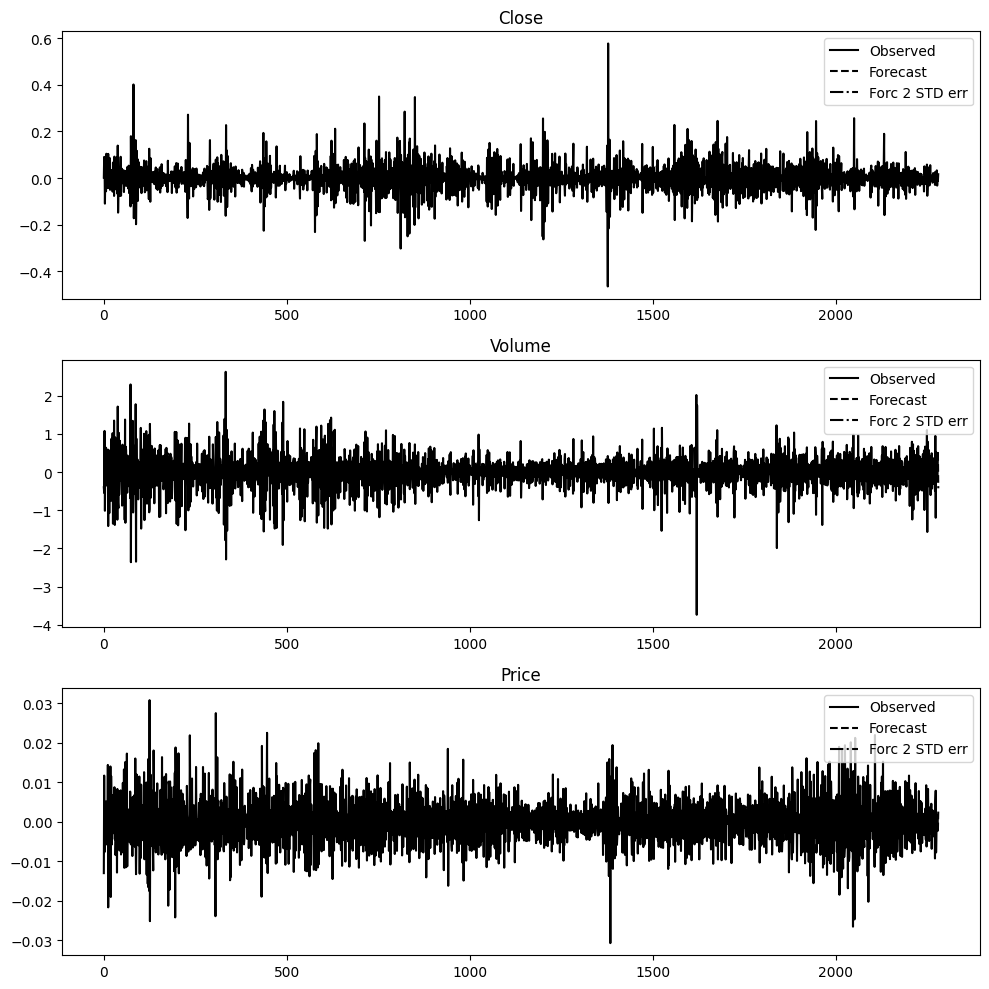

In [ ]:
lag_order = results.k_ar
predicted = results.forecast(log_diff.values[-lag_order:],n_obs)
forecast = pd.DataFrame(predicted, index = log_diff.index[-n_obs:], columns = log_diff.columns)


# построение предсказанных значений
p1 = results.plot_forecast(1)
p1.tight_layout()

In [ ]:
# интвертирование Differencing Transformation
def invert_transformation(df, df_forecast, second_diff):
    for col in df.columns:
        # Отменить 2-е различие
        if second_diff:
            df_forecast[str(col)] = (df[col].iloc[-1] - df[col].iloc[-2]) + df_forecast[str(col)].cumsum()
        # Отменить 1-е различие
        df_forecast[str(col)] = df[col].iloc[-1] + df_forecast[str(col)].cumsum()

    return df_forecast

forecast_values = invert_transformation(train, forecast, second_diff=True)
forecast_values

,Close,Volume,Price
Date,,,
2023-10-03,0.104582,1.956211,0.022720
2023-10-04,0.183989,2.975334,0.041463
2023-10-05,0.258510,4.121442,0.059590
2023-10-06,0.328206,5.158624,0.078072
2023-10-09,0.406825,6.294428,0.096063
2023-10-10,0.484102,7.423216,0.113744
2023-10-11,0.559662,8.533714,0.131240


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future

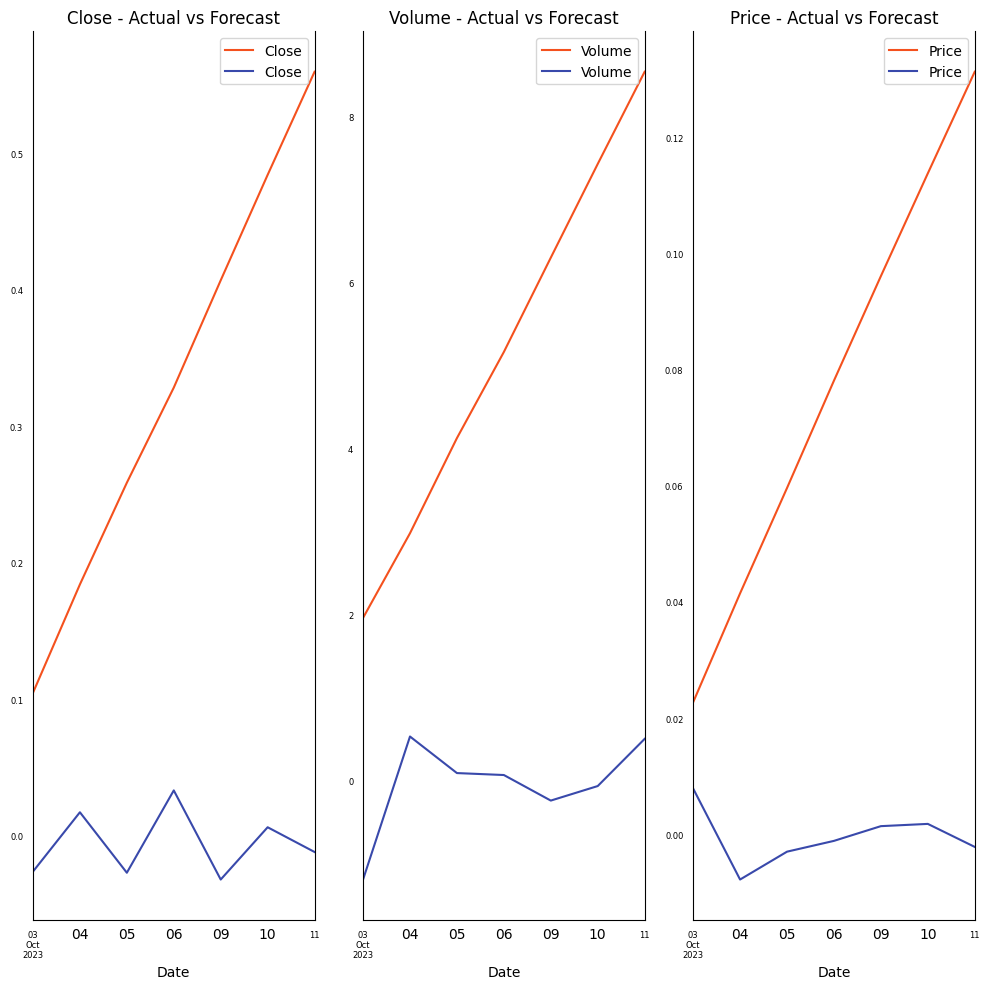

In [ ]:
# Фактические и прогнозируемые графики
fig, axes = plt.subplots(nrows = int(len(log_diff.columns)/2), ncols = 3, dpi = 100, figsize = (10,10))

for i, (col,ax) in enumerate(zip(log_diff.columns, axes.flatten())):
    forecast_values[col].plot(color = '#F4511E', legend = True, ax = ax).autoscale(axis =' x',tight = True)
    test[col].plot(color = '#3949AB', legend = True, ax = ax)

    ax.set_title(col + ' - Actual vs Forecast')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize = 6)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from numpy import asarray as arr
mse = mean_squared_error(test, forecast_values)
print("\nMean Squared Error: ", mse)


Mean Squared Error:  10.600273177952355


## XGBoost

Обычно регрессии ARIMA используются в классических статистических подходах, когда ставятся цели не только прогнозирования, но и понимания того, как различные объясняющие переменные соотносятся с зависимой переменной и друг с другом. ARIMA разработаны специально для данных временных рядов.

Напротив, модели XGBoost используются в подходах чисто машинного обучения, где мы заботимся исключительно о качестве прогнозирования. Регрессоры XGBoost можно использовать для прогнозирования временных рядов, даже если они специально не предназначены для долгосрочных прогнозов. Но они могут работать.

#### [Что такое бустинг и как работает XGBoost?](https://www.datacamp.com/community/tutorials/xgboost-in-python#what )

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

log_diff.head()

,Close,Volume,Price
Date,,,
2014-09-19,0.002242,-0.398250,-0.013024
2014-09-22,0.090863,-0.547113,0.011712
2014-09-23,0.061872,1.077629,-0.007685
2014-09-24,-0.109639,-1.012481,0.001652
2014-09-25,0.001438,0.254001,0.004357


In [ ]:
# разделение датасета на обучающую и тестовую выборку
X, y = log_diff.iloc[:,:], log_diff.iloc[:,:-2]

data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 1, alpha = 10, n_estimators = 200)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.038930


In [ ]:
data_dmatrix

### Перекрестная проверка (k-кратная)

Поскольку XGBoost не специфичен для данных временных рядов, для построения более надежных моделей обычно выполняется k-кратная перекрестная проверка, при которой все записи в исходном наборе обучающих данных используются как для обучения, так и для проверки. Кроме того, каждая запись используется для проверки только один раз. XGBoost поддерживает k-кратную перекрестную проверку с помощью метода cv(). Все, что вам нужно сделать, это указать параметр unfolds, который представляет собой количество наборов перекрестной проверки, которые вы хотите создать.

<small>[Source](https://www.datacamp.com/community/tutorials/xgboost-in-python/)</small>

In [ ]:
params = {"objective" : "reg:linear",
          'colsample_bytree' : 0.3,
          'learning_rate' : 0.1,
          'max_depth' : 2,
          'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:05:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.060671,0.001652,0.060661,0.003516
1,0.060671,0.001652,0.060661,0.003516
2,0.058332,0.001648,0.058317,0.003630
3,0.056282,0.001629,0.056250,0.003753
4,0.054428,0.001646,0.054397,0.003830


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.041026
Name: test-rmse-mean, dtype: float64


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

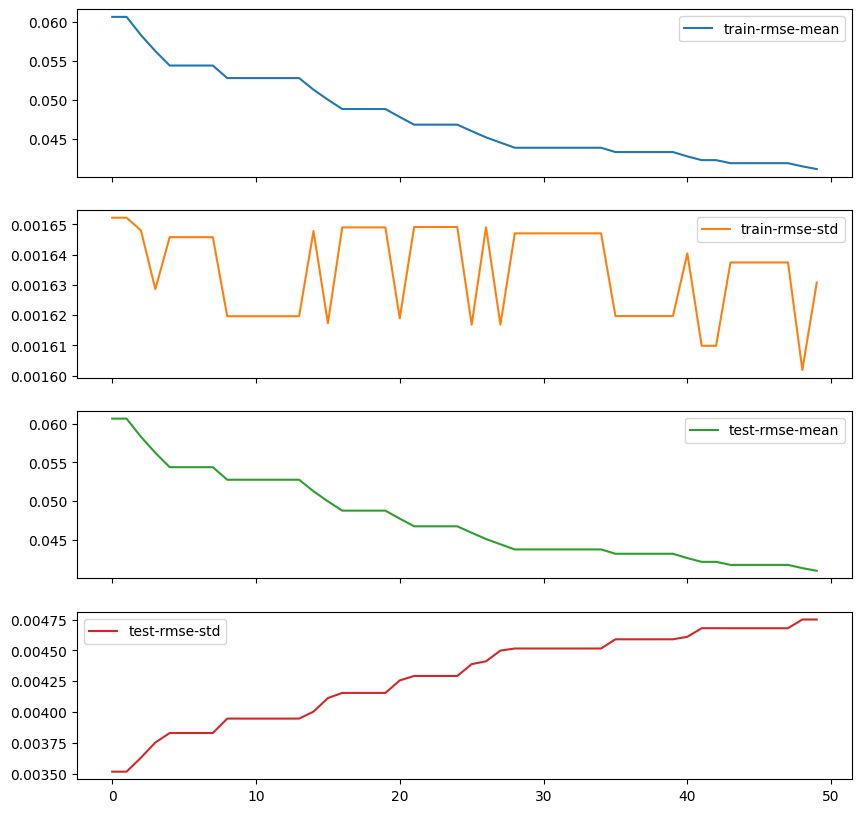

In [ ]:
cv_results.plot(subplots=True, figsize=(10,10))

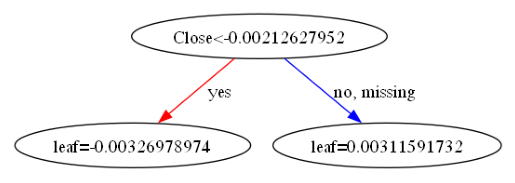

In [ ]:
# тут необходимо скачать Graphviz c graphviz.org
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(xg_reg, {'max_depth': [2,4,6],'n_estimators': [50, 100, 200]}, verbose=1,n_jobs=2)
clf.fit(X, y)

print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.7136970204015478
{'max_depth': 2, 'n_estimators': 200}


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

## Пророк Facebook

Библиотека с открытым исходным кодом доступна [здесь](https://facebook.github.io/prophet /)

Facebook prophet был создан для работы в качестве инструмента для большинства общих прогнозов временных рядов. Он прост в использовании и интуитивно понятным образом обучает начинающих машинному обучению.

Facebook также позволяет тем, кто разбирается в предметной области, не быть заблокированными, когда они получают ответ и получают некоторую дополнительную информацию, которая может принести некоторую пользу.

Если вы используете другие библиотеки прогнозирования. Эти другие библиотеки проделали большую фундаментальную работу и прогнозируют, что в библиотеке есть два автоматизированных метода: один - auto.arima, а другой - экспоненциальное сглаживание. Они оба выполняют процесс выбора модели, поэтому они действительно пытаются выполнить за вас большую работу и устранить много трудностей при построении модели, но иногда вы могли бы получить плохо работающие модели, если бы просто применили их к набору данных. Поскольку результаты не всегда достаточно интуитивны, чтобы улучшить прогноз.

Facebook prophet способен визуализировать важные особенности временных рядов, такие как тенденции, выбросы, сезонность и т.д. Кроме того, метод прогнозирования достаточно надежен, чтобы обрабатывать любые пропущенные значения.

Поэтому, как правило, при решении задач с временными рядами вы хотели бы смоделировать процесс генерации того, как будет создаваться этот временной ряд. Это становится трудным для написания, генерирующая модель для процесса временных рядов подобна тому, что в каждом состоянии будет возникать новая проблема, и она будет каким-то образом зависеть от прошлого. Вместо этого facebook построил дискриминационную модель, которая представляет собой простую разложимую модель временных рядов. Это обобщенная аддитивная модель, поэтому каждый компонент является аддитивным, но отдельные компоненты могут быть нелинейными.

$$
y(t) = \text{piecewise_trend}(t) + \text{seasonality}(t) + \text{holiday-effects}(t) + \text{noise}
$$

Первый компонент - это кусочный тренд, который может быть либо логистическим трендом, либо линейным трендом, и это в основном будет определять, насколько быстро растет или уменьшается временной ряд.

Второй компонент - это сезонность, то есть то, что происходит регулярно, циклически. В комплект входят некоторые праздничные эффекты и шумоподавление.

Кусочный тренд разрабатывается с использованием L1-регуляризованных сдвигов тренда. Сезонность рассчитывается с использованием рядов Фурье. А праздничные эффекты разрабатываются с использованием фиктивных переменных. Они не слишком сложны.

Кусочно-линейный тренд или логистический тренд разрабатывается путем генерации набора возможных точек изменения. Это точки, в которых модель, по ее мнению, потенциально может изменить свою траекторию, затем они помещают априор Лапласа, который похож на разреженный априор, в котором предполагается, что большую часть времени эти изменения равны нулю, но иногда это позволит ей измениться. Таким образом, данные, по сути, расскажут нам, когда временной ряд изменил свою траекторию, что является действительно приятной особенностью. Итак, prophet учится на основе данных, как локально экстраполировать результаты моделирования на основе прошлых данных.

[Источник](https://www.youtube.com/watch?v=pOYAXv15r3A&feature=youtu.be )

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
# построение графиков для каждой серии
def fit_model(df):
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    return m, forecast, future

def fb_plots(m, fore):
    return plot_plotly(m, forecast)

def fb_subplots(m, fore):
    return m.plot(forecast), m.plot_components(forecast)

### Предсказание цены закрытия биткоина

In [ ]:
bc = pd.read_csv("BTC-USD.csv")
bc_price = bc.drop(bc.columns[[1,2,3,5,6]], axis=1)
bc_vol = bc.drop(bc.columns[[1,2,3,4,5]], axis=1)
bc_price.columns = ["ds","y"]
bc_vol.columns = ["ds","y"]
bc_price.head()

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [ ]:
model, forecast, future = fit_model(bc_price)

14:06:04 - cmdstanpy - INFO - Chain [1] start processing
14:06:06 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future.tail()

,ds
3673,2024-10-07
3674,2024-10-08
3675,2024-10-09
3676,2024-10-10
3677,2024-10-11


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3673,2024-10-07,4731.146937,-6243.843532,15829.946814
3674,2024-10-08,4741.760046,-6701.626530,15334.905701
3675,2024-10-09,4780.677390,-6738.162902,16299.961354
3676,2024-10-10,4747.612580,-6175.330970,15668.268015
3677,2024-10-11,4760.584056,-6590.657117,15716.010379


In [ ]:
fb_plots(model, forecast)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


Согласно прогнозу, стоимость биткойна продолжит расти. В конце 2020 года произошел новый всплеск, который дополнил этот прогноз.

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the

(<Figure size 1000x600 with 1 Axes>, <Figure size 900x1200 with 4 Axes>)

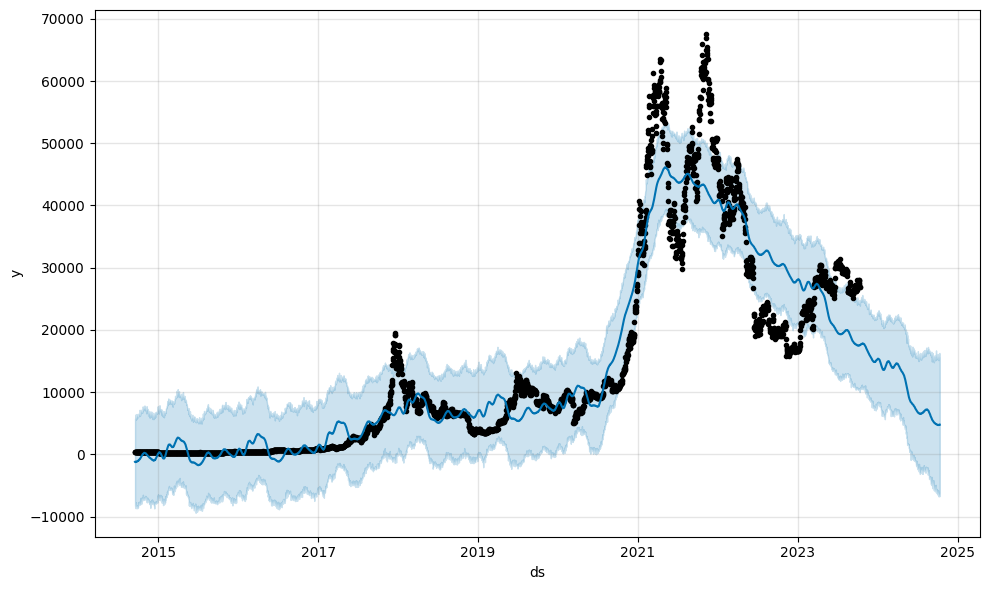

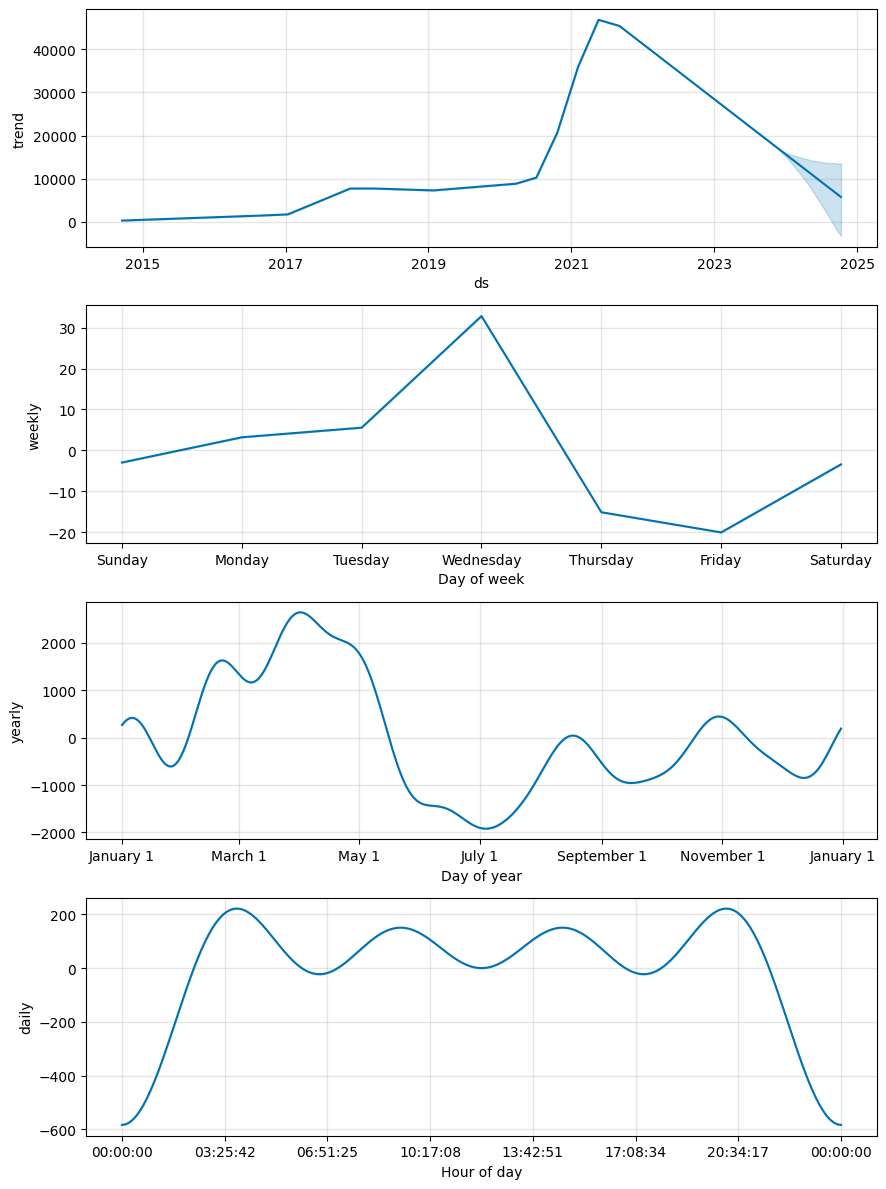

In [ ]:
fb_subplots(model, forecast)

### Предсказание цены доллара

In [ ]:
usd = pd.read_csv("DX-Y.NYB.csv")
usd = usd.drop(usd.columns[[2,3,4,5,6]], axis=1)
usd.columns = ["ds","y"]
usd.head()

,ds,y
0,2014-09-17,84.099998
1,2014-09-18,84.739998
2,2014-09-19,84.279999
3,2014-09-21,NaN
4,2014-09-22,84.809998


In [ ]:
model, forecast, future = fit_model(usd)

14:08:08 - cmdstanpy - INFO - Chain [1] start processing
14:08:10 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future.tail()

,ds
2642,2024-10-06
2643,2024-10-07
2644,2024-10-08
2645,2024-10-09
2646,2024-10-10


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2642,2024-10-06,110.786470,100.139605,121.986356
2643,2024-10-07,110.830776,99.702715,122.172932
2644,2024-10-08,110.863619,100.578374,122.094095
2645,2024-10-09,110.867918,99.941700,122.598924
2646,2024-10-10,110.841819,100.259479,122.354860


In [ ]:
fb_plots(model, forecast)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the

(<Figure size 1000x600 with 1 Axes>, <Figure size 900x1200 with 4 Axes>)

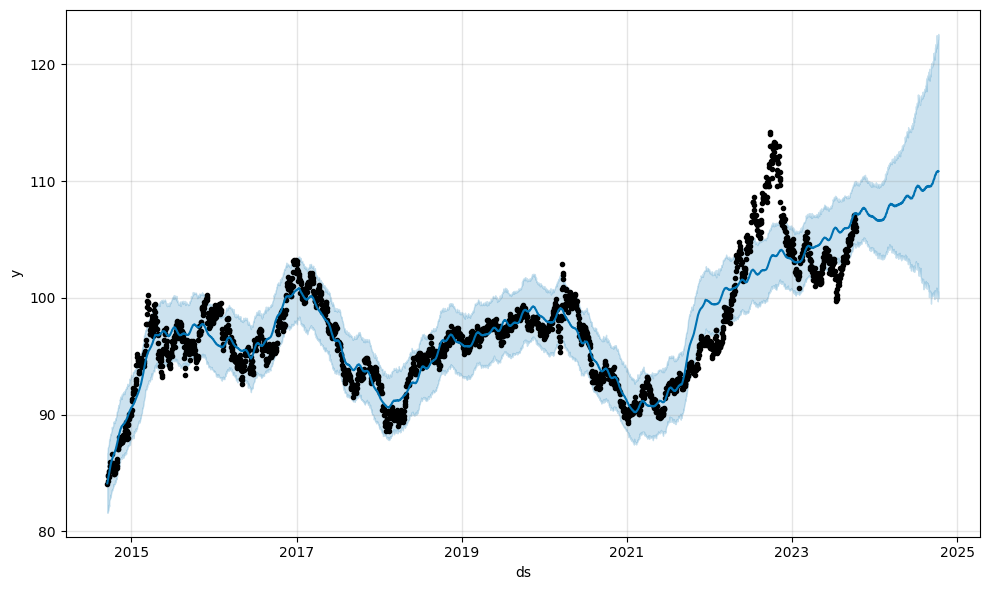

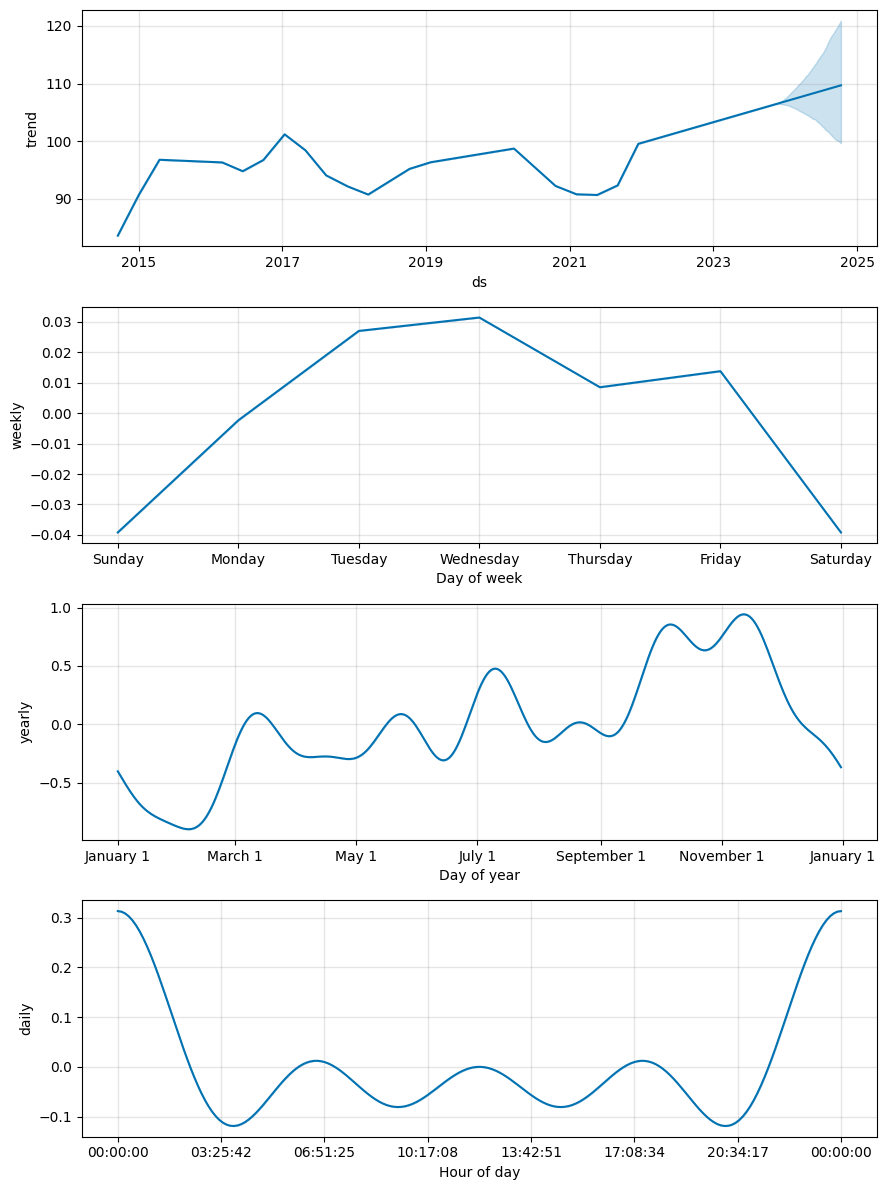

In [ ]:
fb_subplots(model, forecast)

### Предсказание объёма торгов биткоина

In [ ]:
bc_vol.head()

,ds,y
0,2014-09-17,21056800
1,2014-09-18,34483200
2,2014-09-19,37919700
3,2014-09-20,36863600
4,2014-09-21,26580100


In [ ]:
model, forecast, future = fit_model(bc_vol)

14:09:17 - cmdstanpy - INFO - Chain [1] start processing
14:09:20 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future.tail()

,ds
3673,2024-10-07
3674,2024-10-08
3675,2024-10-09
3676,2024-10-10
3677,2024-10-11


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3673,2024-10-07,3.899717e+09,-1.705130e+10,2.592609e+10
3674,2024-10-08,3.926922e+09,-1.784434e+10,2.724319e+10
3675,2024-10-09,4.305663e+09,-1.678854e+10,2.763980e+10
3676,2024-10-10,4.054971e+09,-1.792053e+10,2.816349e+10
3677,2024-10-11,4.357328e+09,-1.765912e+10,2.930133e+10


In [ ]:
model, forecast, future = fit_model(bc_vol)
fb_plots(model, forecast)
fb_subplots(model, forecast)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Мы легко можем просмотреть прогноз по объему биткоина. Прогноз предсказывает продолжение тенденции к росту. Скорее всего, мы можем отнести это к уровню пользователей, торгующих на robinhood или других платформах. Спрос растет, и по мере того, как все больше людей покупают, тем больше биткоинов находится в обращении по всей экономике.

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the

(<Figure size 1000x600 with 1 Axes>, <Figure size 900x1200 with 4 Axes>)

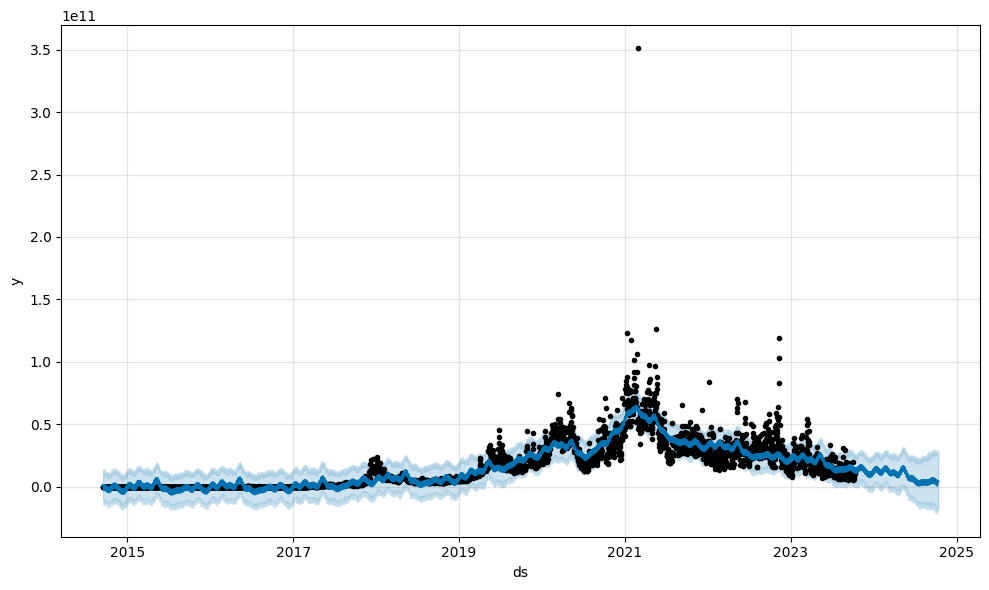

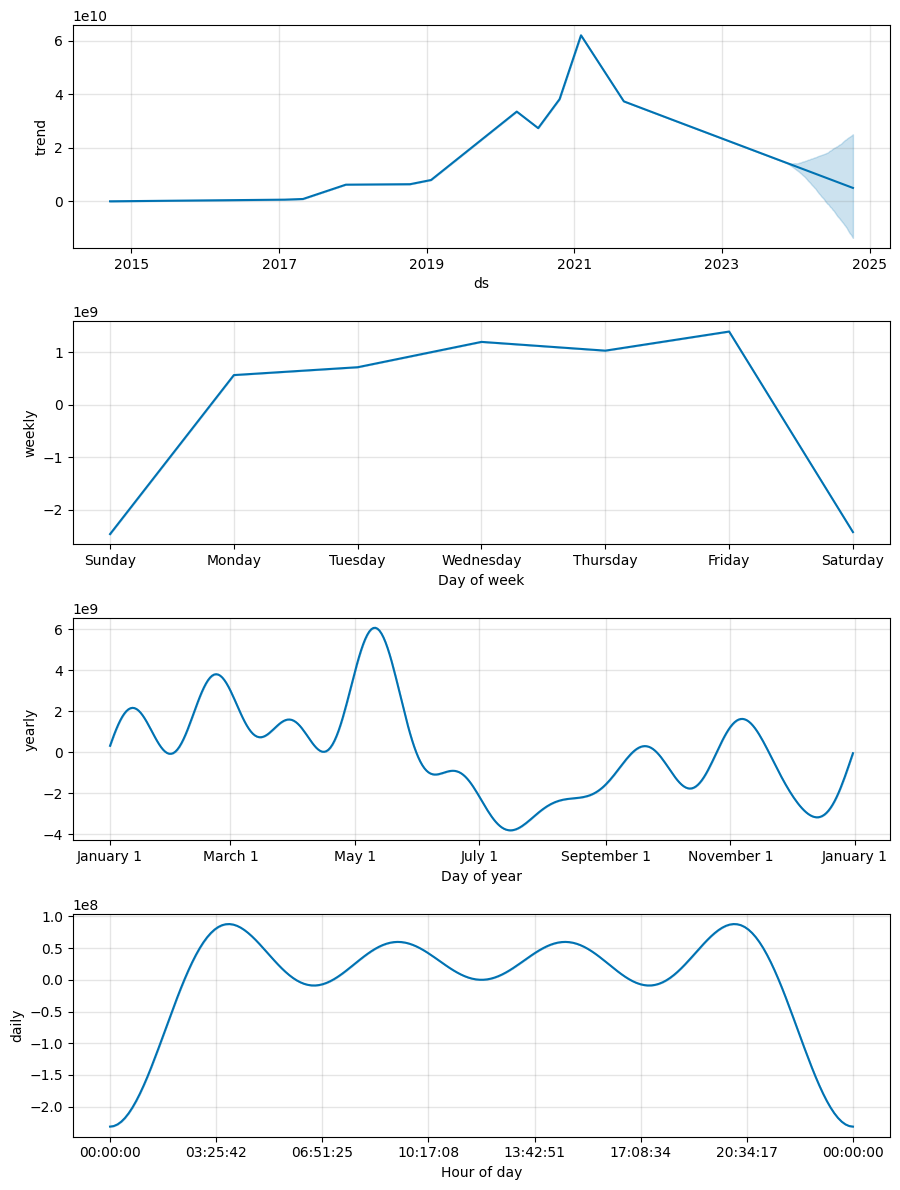

In [ ]:
fb_subplots(model, forecast)

Prophet легко позволяет нам быстро просматривать прогнозы для отдельной серии. Здесь мы смогли сделать это для цены закрытия биткойна, цены в долларах США и объема биткойна. Эти переменные важны, потому что, как упоминалось в the being, аналитики рассматривают резкий рост биткоина из-за легкости, с которой люди могут торговать через robinhood и другие приложения, а также в качестве хеджирования против доллара США из-за текущего состояния мировых дел.

Согласно прогнозам для каждой серии, по крайней мере, в ближайшем будущем мы продолжим наблюдать рост стоимости биткоина. Это можно было бы объяснить прогнозом о том, что курс доллара США снизится, и прогнозом о том, что количество биткоинов в обращении также будет увеличиваться.

Первоначальные две модели (VAR и XGBoost) смогли определить по крайней мере одно из этих значений, но не так легко и быстро, как prophet.